In [26]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter

import json

global static #增加一個全域變數用來紀錄統計結果
static={}

In [2]:
import _thread
import time
import threading

In [3]:
with open('./wordlen.txt') as f: #打開我們要比對的字典檔
    wordlen = f.read().split('\n')
del wordlen[0]
wordlen[:10]

['C', 'C++', 'C#', 'PYTHON', 'JAVA', 'JAVASCRIPT', 'PHP', 'HTML', 'SQL', 'CSS']

In [4]:
def inner_word(url): #一個用來分析內頁的function
    
    inner = requests.get(url)  #用get連到網頁
    innersoup = BeautifulSoup(inner.text, 'lxml')  #放到BeautifulSoup解析
    innerselect2 = str(innersoup.select_one('div.job-detail-box > dl')).upper()  
    #找到可能會出現找尋目標的區塊將全部英文變大寫
    innerselect = str(innersoup.select_one('div.> p')).upper()
    #同上
    lan1=re.findall('[A-Z]+[+#?]*' , innerselect)
    #用正規法抓出每個英文單字
    lan2=re.findall('[A-Z]+[+#?]*' , innerselect2)
    #同上 第二區塊的
    lan1.extend(lan2)
    #將兩個list合併
    if 'HTML#' in lan1:
        lan1.remove('HTML#')
    #排除調內文出現的雜訊
    if 'HTML?' in lan1:
        lan1.remove('HTML?')
    #雜訊2
    lan1 = list(set(lan1))
    #清除調list內重複的部份
    
    for i in lan1: #將每個元素都跑過 內容會顯示在i
        if i in wordlen: #如果list裡面的字有出現在我們的字典檔中
            if i in static:  #如果static已經有這個字 就在value+1
                static[i] += 1
            else:
                static[i] = 1 #如果static統計的字典檔還沒有這個字 就新增
    return static

In [5]:
def page(url):  #這是用來抓出搜尋畫面中所有的case連結
    res = requests.get(url)
    time.sleep(0.5)
    soup = BeautifulSoup(res.text, 'lxml')
    time.sleep(0.5)
    links = soup.select('li.title > a')
    for link in links:
        inner_word(str(link['href']))#把取得的連結丟到上面inner_word function去解析
        print("%s" %  link['href'])
        print("=" * 50)
    return static

In [6]:
# https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&jobcat=2007000000&order=2&asc=0&page=1'
class MyClass (threading.Thread): #多線程處理
    def __init__(self,number):
        threading.Thread.__init__(self)
        self.number=number
    def run(self): 
        print(('start'+str(self.number)+' '))
        page('https://www.518.com.tw/job-index-P-'+str(self.number)+'.html?i=1&am=1&ab=2032001,2032002,') 
        print(('finish'+str(self.number)+' '))
        time.sleep(0.5)

In [7]:
threads=[]
for i in range(1,54+1): 
    Thread=MyClass(i)
    threads.append(Thread)
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

start1 
start3 
start2 
start4 
start5 
start6 
start7 
start8 
start9 
start10 
start11 
start12 
start13 start14 

start15 
start16 
start17 
start18 
start19 
start20 
start22 start21 start24 start25 


start26 
start27 
start28 start29 start23 



start30 
start31 
start32 
start33 
start34 
start35 start36 start37 start38 start39 




start40 
start42 start41 
start43 

start44 
start47 start45 start46 


start48 
start49 
start50 
start51 
start52 
start53 
start54 
https://www.518.com.tw/網拍直播小助手-新北市-新莊區-job-1313373.html?kw=&pi=3
https://www.518.com.tw/巧連智-MIS工程師-台北市-中正區-job-1347785.html?kw=&pi=2
https://www.518.com.tw/app研發人員-廣東省-深圳市-job-1216542.html?kw=&pi=18
https://www.518.com.tw/Android  iOS APP開發工程師(中國崑山)-新北市-五股區-job-1071547.html?kw=&pi=54
https://www.518.com.tw/電腦工程師(後端)-台中市-南屯區-job-1191073.html?kw=&pi=51
https://www.518.com.tw/RWD網頁設計切版-台中市-北區-job-318456.html?kw=&pi=5
https://www.518.com.tw/777-(北區免輪班8小時)周周休2日 高轉正,際-新北市-全區-job-1337757.html?kw=&pi=4
https://www.518.com.tw/

https://www.518.com.tw/程式設計工程師-台中市-清水區-job-388758.html?kw=&pi=8https://www.518.com.tw/正職JAVA程式設計師HRI-台北市-松山區-job-847529.html?kw=&pi=14

https://www.518.com.tw/維運工程師-台北市-內湖區-job-1170721.html?kw=&pi=3

https://www.518.com.tw/系統分析師-互聯網+服務事業處-台北市-中山區-job-1219050.html?kw=&pi=43
https://www.518.com.tw/歡迎同業轉任、無雜費、廣告強力支援-桃園市-桃園區-job-1042259.html?kw=&pi=45
https://www.518.com.tw/資通系統工程師-台中市-西屯區-job-350226.html?kw=&pi=32
https://www.518.com.tw/軟體研發工程師-新北市-新店區-job-260375.html?kw=&pi=26
==================================================https://www.518.com.tw/資訊人員-台北市-中山區-job-616299.html?kw=&pi=33
https://www.518.com.tw/廠務助理-江蘇省-蘇州市-job-887479.html?kw=&pi=39

https://www.518.com.tw/安卓工程師和ios工程師-新竹市-北區-job-1075998.html?kw=&pi=53
https://www.518.com.tw/遊戲開發工程師-台北市-內湖區-job-1326787.html?kw=&pi=10==================================================

https://www.518.com.tw/軟體工程人員-台北市-信義區-job-1128641.html?kw=&pi=17https://www.518.com.tw/MIS專員-新北市-泰山區-job-357678.html?kw=&pi=7
================================

https://www.518.com.tw/Server 韌體設計工程師【林口】-桃園市-龜山區-job-860399.html?kw=&pi=26https://www.518.com.tw/系統分析師 SA-台北市-信義區-job-1337496.html?kw=&pi=9https://www.518.com.tw/硬體工程師-苗栗縣-竹南鎮-job-22243.html?kw=&pi=6

https://www.518.com.tw/Internet程式設計師-台中市-西屯區-job-1185018.html?kw=&pi=49

https://www.518.com.tw/網路行銷與技術人員-高雄市-苓雅區-job-1056206.html?kw=&pi=42https://www.518.com.tw/Flash遊戲開發工程師-台中市-南屯區-job-671915.html?kw=&pi=41https://www.518.com.tw/MIS工程師 專員-新北市-汐止區-job-1333868.html?kw=&pi=12




https://www.518.com.tw/台安藥局 - 高雄七賢店 - 行政藥師助理-高雄市-鳳山區-job-973941.html?kw=&pi=7

https://www.518.com.tw/軟體設計工程師-台北市-松山區-job-730456.html?kw=&pi=19====================================================================================================


https://www.518.com.tw/程式設計師-台北市-大安區-job-1236714.html?kw=&pi=15
https://www.518.com.tw/iOS Android 研發工程師-台中市-西屯區-job-1280809.html?kw=&pi=28
https://www.518.com.tw/html5網站網頁設計工程師-新北市-樹林區-job-986583.html?kw=&pi=16
https://www.518.com.tw/電腦維修工程師-台中市-北區-job-72353.html?kw=&pi

https://www.518.com.tw/網拍管理人員-台中市-北區-job-168884.html?kw=&pi=50
https://www.518.com.tw/網拍美編銷售人員 網拍上架 美工設計-台南市-仁德區-job-1189920.html?kw=&pi=5https://www.518.com.tw/電子工程師-新北市-新店區-job-722004.html?kw=&pi=34https://www.518.com.tw/.NET軟體工程師(新竹)-新竹市-東區-job-671763.html?kw=&pi=23==================================================



https://www.518.com.tw/網頁開發工程師-宜蘭縣-宜蘭市-job-1089894.html?kw=&pi=54https://www.518.com.tw/網站修改及維護人員-台北市-內湖區-job-212774.html?kw=&pi=52

====================================================================================================https://www.518.com.tw/PHP工程師-台北市-松山區-job-1324084.html?kw=&pi=25
https://www.518.com.tw/機房系統工程師-台北市-內湖區-job-1050255.html?kw=&pi=42



https://www.518.com.tw/C  程式設計工程師 (台南)-台南市-永康區-job-1107372.html?kw=&pi=43
https://www.518.com.tw/週休二日公司企業網頁美工,公司企業網站架設,週休二日-台北市-大安區-job-803818.html?kw=&pi=13
https://www.518.com.tw/電子商務平台後台JAVA開發工程師-新竹縣-竹北市-job-1151048.html?kw=&pi=21https://www.518.com.tw/php開發工程師-高雄市-前鎮區-job-1342325.html?kw=&pi=2============

https://www.518.com.tw/自動化工程師(台南)-台南市-永康區-job-1107569.html?kw=&pi=43
==================================================https://www.518.com.tw/App開發工程師(iOS Android)-台中市-西區-job-1242885.html?kw=&pi=29https://www.518.com.tw/網站程式設計師-台北市-內湖區-job-906170.html?kw=&pi=35https://www.518.com.tw/資訊維運人員(南京)-台北市-松山區-job-1111365.html?kw=&pi=44




https://www.518.com.tw/網站程式php工程師-台南市-北區-job-1222111.html?kw=&pi=22
https://www.518.com.tw/GUI開發設計工程師-台中市-大雅區-job-984557.html?kw=&pi=45
https://www.518.com.tw/網頁軟體工程師-台北市-文山區-job-1068284.html?kw=&pi=27
https://www.518.com.tw/網站開發工程師-台北市-信義區-job-815582.html?kw=&pi=37https://www.518.com.tw/雲端維運工程師-台中總公司-台中市-西屯區-job-1349252.html?kw=&pi=14


https://www.518.com.tw/軟體研發工程師-台北市-信義區-job-1356524.html?kw=&pi=1
https://www.518.com.tw/Android 工程師-台北市-松山區-job-1324086.html?kw=&pi=25https://www.518.com.tw/伺服器維修工程師-台北市-中山區-job-724099.html?kw=&pi=8


https://www.518.com.tw/Unity VR應用開發工程師-廣東省-清遠市-job-1286525.html?kw=&pi=18
https://www.518.com.tw/程式設計師-台中市-南屯區-job-294644.htm

https://www.518.com.tw/正職MIS工程師 網管人員HRI-台北市-松山區-job-885455.html?kw=&pi=14https://www.518.com.tw/IT資訊人員-台中市-大里區-job-1219588.html?kw=&pi=8
https://www.518.com.tw/專案實習生-桃園市-桃園區-job-1118292.html?kw=&pi=38==================================================


https://www.518.com.tw/資訊助理-台中市-南屯區-job-789178.html?kw=&pi=33==================================================

https://www.518.com.tw/程式設計師-台北市-松山區-job-1324224.html?kw=&pi=22
https://www.518.com.tw/網路資訊人員-台北市-大同區-job-861798.html?kw=&pi=49==================================================

https://www.518.com.tw/軟韌體工程師-新北市-汐止區-job-281899.html?kw=&pi=36
https://www.518.com.tw/iOS APP 程式開發工程師-桃園市-平鎮區-job-662381.html?kw=&pi=6https://www.518.com.tw/網頁設計(工讀可)-新竹縣-竹東鎮-job-106078.html?kw=&pi=48https://www.518.com.tw/SEO網站企劃專員-台中市-北區-job-1350565.html?kw=&pi=2https://www.518.com.tw/網路程式設計師-新北市-新莊區-job-747302.html?kw=&pi=46




https://www.518.com.tw/雲端物聯網資訊整合工程師-新北市-新店區-job-828839.html?kw=&pi=39https://www.518.com.tw/軟體設計工程師-新北市-新店區-job-1176996.


https://www.518.com.tw/生管過磅儲備幹部-桃園市-蘆竹區-job-964726.html?kw=&pi=23
https://www.518.com.tw/1605427 - Algorithm Developer 演算法工程師 (Location-Hsinchu)-新竹市-東區-job-1268717.html?kw=&pi=19
https://www.518.com.tw/(中科)自動化機械設備-軟體設計工程師(全職代徵)-台中市-后里區-job-1342732.html?kw=&pi=4https://www.518.com.tw/資深PHP MySQL ERP 網站程式設計師-台中市-西區-job-931361.html?kw=&pi=40https://www.518.com.tw/Android 高級工程師-台北市-松山區-job-1324093.html?kw=&pi=25https://www.518.com.tw/外勤電腦維修工程師-台北市-萬華區-job-627066.html?kw=&pi=53
https://www.518.com.tw/客戶服務人員-台南市-安平區-job-251698.html?kw=&pi=30



https://www.518.com.tw/android APP開發-新北市-蘆洲區-job-1018070.html?kw=&pi=11https://www.518.com.tw/定點駐站人員-台北市-士林區-job-1323230.html?kw=&pi=20

https://www.518.com.tw/軟體工程師 (IOS Android 前端開發)-台北市-大安區-job-1074501.html?kw=&pi=37
https://www.518.com.tw/PHP程式設計師-嘉義市-西區-job-967404.html?kw=&pi=32
https://www.518.com.tw/電腦資料輸入工讀生-台北市-松山區-job-928770.html?kw=&pi=47
==================================================https://www.518.com.tw/國內業務-台北市-北投區-job-444440.html?

https://www.518.com.tw/軟體設計工程師、Internet程式設計師-台北市-中山區-job-896106.html?kw=&pi=32
https://www.518.com.tw/川流資訊-Wordpress網站程式工程師(不必接洽客戶,專心設計)(官網web5000.com.tw)-台中市-西屯區-job-1181379.html?kw=&pi=34https://www.518.com.tw/軟體測試工程師 QA Engineer-台北市-內湖區-job-1170622.html?kw=&pi=22
https://www.518.com.tw/Windows 客服工程師-新北市-三重區-job-989071.html?kw=&pi=44
https://www.518.com.tw/2017演員培訓計畫(D)-台北市-信義區-job-1351601.html?kw=&pi=1https://www.518.com.tw/JAVA後端工程師-台北市-內湖區-job-1276972.html?kw=&pi=10https://www.518.com.tw/軟體工程師-台北市-內湖區-job-716117.html?kw=&pi=7

https://www.518.com.tw/有線電視裝機人員-台北市-全區-job-789922.html?kw=&pi=33

https://www.518.com.tw/電腦工程師-台北市-北投區-job-746502.html?kw=&pi=45

https://www.518.com.tw/C  程式設計工程師 (新北)-新北市-五股區-job-1107367.html?kw=&pi=43
https://www.518.com.tw/asp程式設計師-新北市-三重區-job-1307349.html?kw=&pi=2https://www.518.com.tw/PHP網站程式設計師-台北市-松山區-job-792262.html?kw=&pi=36
https://www.518.com.tw/軟體設計工程師-高雄市-三民區-job-727489.html?kw=&pi=16
https://www.518.com.tw/軟體程式設計師-台北市-大安區-job-166628.html?kw=&p

https://www.518.com.tw/軟體工程師-台北市-南港區-job-659192.html?kw=&pi=52https://www.518.com.tw/產品經理Product Manager-台北市-松山區-job-1290693.html?kw=&pi=29

https://www.518.com.tw/PHP 程式設計師-台北市-大安區-job-1308235.html?kw=&pi=42
https://www.518.com.tw/硬體(韌體)設計工程師-台北市-南港區-job-1135477.html?kw=&pi=11==================================================

https://www.518.com.tw/工程工程師-台中市-大雅區-job-7748.html?kw=&pi=19
https://www.518.com.tw/航站系統維護駐點人員-台北市-松山區-job-928801.html?kw=&pi=50https://www.518.com.tw/急徵網拍小幫手 熟電腦先錄取 近逢甲-台中市-西屯區-job-1132751.html?kw=&pi=26

https://www.518.com.tw/PHP軟體工程師-台中市-西區-job-1224308.html?kw=&pi=32https://www.518.com.tw/Account Manager-台北市-信義區-job-528018.html?kw=&pi=5

https://www.518.com.tw/網站後端工程師-台北市-內湖區-job-763477.html?kw=&pi=48https://www.518.com.tw/西區 (代徵)PHP程式工程師-台中市-西區-job-1298430.html?kw=&pi=12https://www.518.com.tw/Drupal 網站開發助理工程師(後端)-台北市-大安區-job-1174327.html?kw=&pi=16



https://www.518.com.tw/Flash Builder 設計師-桃園市-中壢區-job-763179.html?kw=&pi=39
https://www.518.com.tw/韌體 硬體開發人員-

https://www.518.com.tw/資訊人員-台北市-信義區-job-1005251.html?kw=&pi=18
https://www.518.com.tw/ASP PHP 網頁程式工程師-新竹市-東區-job-1011650.html?kw=&pi=23https://www.518.com.tw/FabCafe 開源硬體設計師-台北市-中正區-job-999952.html?kw=&pi=37https://www.518.com.tw/應用軟體設計工程師-台北市-南港區-job-858286.html?kw=&pi=40==================================================https://www.518.com.tw/資訊人員-台中市-太平區-job-1240681.html?kw=&pi=33




https://www.518.com.tw/電子商務-桃園市-平鎮區-job-1175726.html?kw=&pi=31https://www.518.com.tw/網頁工程師(PHP + MySQL)-台北市-內湖區-job-654181.html?kw=&pi=36
==================================================https://www.518.com.tw/約聘工程師助理-二個月-台北市-南港區-job-1328573.html?kw=&pi=3



==================================================https://www.518.com.tw/門市助理-桃園市-大溪區-job-666930.html?kw=&pi=53==================================================https://www.518.com.tw/網路廣告管理人員-台中市-西屯區-job-1004387.html?kw=&pi=42


https://www.518.com.tw/電子商務技術人員-高雄市-鳳山區-job-1230065.html?kw=&pi=8
https://www.518.com.tw/軟體設計工程師-新北市-板橋區-job-1354552.htm

https://www.518.com.tw/Visual Foxpro程式設計師-台北市-松山區-job-695230.html?kw=&pi=38
https://www.518.com.tw/系統工程師(SE)-台北市-南港區-job-1183649.html?kw=&pi=41https://www.518.com.tw/Internet程式設計-早班-嘉義市-東區-job-1245885.html?kw=&pi=11
https://www.518.com.tw/電控電機系統工程師-高雄市-岡山區-job-336284.html?kw=&pi=9
==================================================https://www.518.com.tw/業務助理-台南市-東區-job-398854.html?kw=&pi=25

https://www.518.com.tw/QA(資深)系統工程師-桃園市-中壢區-job-1108014.html?kw=&pi=2==================================================


https://www.518.com.tw/網路行銷-新北市-深坑區-job-334925.html?kw=&pi=50
https://www.518.com.tw/系統 網路工程師-台北市-內湖區-job-1213981.html?kw=&pi=20
https://www.518.com.tw/SEO工程師-台北市-內湖區-job-1325847.html?kw=&pi=22
https://www.518.com.tw/美編 懂網路-台北市-士林區-job-947355.html?kw=&pi=4
https://www.518.com.tw/系統程式設計工程師-台北市-內湖區-job-1313881.html?kw=&pi=28
https://www.518.com.tw/雲端技術工程師-新竹縣-竹北市-job-688894.html?kw=&pi=35
https://www.518.com.tw/PHP資深程式設計師-新北市-中和區-job-912313.html?kw=&pi=52============================

https://www.518.com.tw/約聘資訊人員(台北)-新北市-五股區-job-947032.html?kw=&pi=49https://www.518.com.tw/會計(具網拍經驗網站行銷企劃後台管理者)可兼-高雄市-鼓山區-job-952113.html?kw=&pi=9https://www.518.com.tw/(總公司)資訊中心 系統分析師-台北市-大安區-job-1202761.html?kw=&pi=4https://www.518.com.tw/電話行銷人員-彰化縣-彰化市-job-1312407.html?kw=&pi=39



https://www.518.com.tw/維修工程師-彰化縣-彰化市-job-103274.html?kw=&pi=46


https://www.518.com.tw/網拍高手-新北市-板橋區-job-524513.html?kw=&pi=42https://www.518.com.tw/軟體工程師-台中市-太平區-job-1058726.html?kw=&pi=25
==================================================https://www.518.com.tw/電腦維修工程師(羅東分校)-宜蘭縣-羅東鎮-job-1057581.html?kw=&pi=43


https://www.518.com.tw/美編網管人員(彰化店 桃園店)-彰化縣-大村鄉-job-1078668.html?kw=&pi=19
https://www.518.com.tw/資訊人員-新北市-永和區-job-1250917.html?kw=&pi=37
https://www.518.com.tw/中華電信商務應用資訊助理-台北市-中正區-job-1351201.html?kw=&pi=17
https://www.518.com.tw/電話行銷人員-彰化縣-彰化市-job-1312401.html?kw=&pi=34
https://www.518.com.tw/前端介面工程師-台北市-大同區-job-1223207.html?kw=&pi=6https://www.518.com.tw/後端工程師-高雄市-鳳山區-job-1242080.html?kw=&pi=50h

https://www.518.com.tw/台北市南港區 本土壽險公司JAVA工程師-台北市-南港區-job-1231166.html?kw=&pi=17
https://www.518.com.tw/助理工程師-台北市-內湖區-job-1166388.html?kw=&pi=38
https://www.518.com.tw/Internet程式設計師(.Net)-台中市-北區-job-905564.html?kw=&pi=51
https://www.518.com.tw/網路管理工程師-台北市-信義區-job-1107805.html?kw=&pi=47==================================================

https://www.518.com.tw/工程師-桃園市-平鎮區-job-953319.html?kw=&pi=52
https://www.518.com.tw/MIS工程師-台北市-大安區-job-1312362.html?kw=&pi=12https://www.518.com.tw/網拍助理-苗栗縣-頭份鎮-job-889649.html?kw=&pi=18

==================================================https://www.518.com.tw/系統軟體設計工程師-台北市-南港區-job-858280.html?kw=&pi=40==================================================


https://www.518.com.tw/iOS Developer-高雄市-前鎮區-job-1328266.html?kw=&pi=11
https://www.518.com.tw/(急徵)中正區-數位工程師-台北市-中正區-job-1301191.html?kw=&pi=33==================================================

https://www.518.com.tw/MIS  管理人員-廣東省-東莞市-job-813293.html?kw=&pi=14
https://www.518.com.tw/Android開發工程師-台北市-南港區-j

https://www.518.com.tw/專案管理師-台北市-內湖區-job-1170602.html?kw=&pi=22
==================================================https://www.518.com.tw/自動控制電機技術人員(無經驗可,有經驗者佳)-台中市-北屯區-job-114384.html?kw=&pi=34https://www.518.com.tw/Network Engineer Specialist-台北市-內湖區-job-1170750.html?kw=&pi=2



https://www.518.com.tw/網站修改及維護人員-台北市-內湖區-job-212774.html?kw=&pi=51
https://www.518.com.tw/資訊幹部(國光店)-台中市-大里區-job-854606.html?kw=&pi=30
https://www.518.com.tw/系統研發工程師-台北市-大同區-job-1223215.html?kw=&pi=16==================================================
https://www.518.com.tw/主機板韌體研發(高級)工程師-台北市-內湖區-job-852441.html?kw=&pi=39

https://www.518.com.tw/資訊部專員-台北市-大安區-job-257987.html?kw=&pi=14
https://www.518.com.tw/Unity遊戲開發工程師-台北市-中山區-job-1211727.html?kw=&pi=46
https://www.518.com.tw/資訊專員-台北市-中山區-job-292584.html?kw=&pi=27https://www.518.com.tw/PHP網頁工程師-台中市-西屯區-job-491829.html?kw=&pi=31https://www.518.com.tw/MIS網路工程師-台中市-西區-job-1133142.html?kw=&pi=32

https://www.518.com.tw/業務助理工讀-新北市-三重區-job-1049563.html?kw=&pi=37=====

https://www.518.com.tw/網站設計工程師-新北市-樹林區-job-945396.html?kw=&pi=15
https://www.518.com.tw/網頁設計人員-台北市-內湖區-job-877168.html?kw=&pi=47https://www.518.com.tw/電子工程師-台中市-南區-job-444095.html?kw=&pi=19



https://www.518.com.tw/MHR-銀行資訊專員(竹科)-新竹市-東區-job-1285377.html?kw=&pi=17
https://www.518.com.tw/系統工程師-台南市-北區-job-679367.html?kw=&pi=50https://www.518.com.tw/網路管理工程師-台中市-西屯區-job-1251995.html?kw=&pi=29


https://www.518.com.tw/技術主管-台北市-全區-job-709716.html?kw=&pi=23https://www.518.com.tw/Internet .Net 網頁工程師-台北市-中正區-job-959699.html?kw=&pi=40https://www.518.com.tw/電腦周邊維修工程師-新北市-三重區-job-1075627.html?kw=&pi=31https://www.518.com.tw/電腦系統維護人員-新北市-土城區-job-490752.html?kw=&pi=26https://www.518.com.tw/電腦操作工程師-桃園市-龜山區-job-475637.html?kw=&pi=28https://www.518.com.tw/購物網站管理人員-高雄市-仁武區-job-986664.html?kw=&pi=3








https://www.518.com.tw/(薪優)C  Developer-台北市-全區-job-1123378.html?kw=&pi=36
https://www.518.com.tw/(薪優).Net Developer-台北市-全區-job-1123380.html?kw=&pi=52
https://www.518.com.tw/System Engineer Specialist-台


http://case.518.com.tw/casepage-detail-124778.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-122640.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-122990.html?from=518&a_id=2183

http://case.518.com.tw/casepage-detail-124254.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-123509.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124872.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-124639.html?from=518&a_id=2183
https://www.518.com.tw/程式資訊助理人員-台北市-北投區-job-1137005.html?kw=&pi=45

https://www.518.com.tw/服務專員-台北市-台北市-全區-job-1282836.html?kw=&pi=29
==================================================https://www.518.com.tw/電腦系統工程師-台北市-內湖區-job-852516.html?kw=&pi=39

https://www.518.com.tw/軟體工程師 (後端系統研發)-台北市-大安區-job-1074500.html?kw=&pi=22http://case.518.com.tw/casepage-detail-124607.html?from=518&a_id=2183

http://case.518.com.tw/casepage-detail-124614.html?from=518&a_id=2183
==============================================

http://case.518.com.tw/casepage-detail-124798.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124091.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124331.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-122815.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-124691.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-124179.html?from=518&a_id=2183


finish11 
http://case.518.com.tw/casepage-detail-123060.html?from=518&a_id=2183
finish42 
http://case.518.com.tw/casepage-detail-124397.html?from=518&a_id=2183
finish18 
https://www.518.com.tw/網拍小幫手-桃園市-八德區-job-263714.html?kw=&pi=52
finish52 http://case.518.com.tw/casepage-detail-124726.html?from=518&a_id=2183

http://case.518.com.tw/casepage-detail-122714.html?from=518&a_id=2183
==================================================http://case.518.com.tw/casepage-detail-124554.html?from=518&a_id=2183

https://www.518.com.tw/網頁管理企劃-台中市-大甲區-job-673791.html?kw=&pi=39
============

http://case.518.com.tw/casepage-detail-122929.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-122843.html?from=518&a_id=2183
finish44 
http://case.518.com.tw/casepage-detail-124266.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124265.html?from=518&a_id=2183
finish22 
http://case.518.com.tw/casepage-detail-124546.html?from=518&a_id=2183
finish15 


In [8]:
static
#結果

{'C': 122,
 'C#': 106,
 'C++': 126,
 'CSS': 139,
 'DELPHI': 4,
 'DNS': 13,
 'FTP': 7,
 'HTML': 202,
 'JAVA': 192,
 'JAVASCRIPT': 67,
 'MYSQL': 187,
 'PERL': 6,
 'PHP': 164,
 'PYTHON': 9,
 'R': 3,
 'RUBY': 3,
 'SQL': 168,
 'SWIFT': 7}

In [9]:
# sorted(static.items(),key=lambda item:

In [25]:
dictlanguage= sorted(static.items(), key=lambda d:d[1],reverse=True)
type(dictlanguage)

list

In [11]:
# import numpy as np
# import pylab as pl
 
# # make an array of random numbers with a gaussian distribution with
# # mean = 5.0
# # rms = 3.0
# # number of points = 1000
# data = dictlanguage.values()
 
# # make a histogram of the data array
# pl.hist(data)
 
# # make plot labels
# pl.xlabel('data')
# pl.show()

In [12]:
type(dictlanguage)

list

In [13]:
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

language = OrderedDict(dictlanguage)
language

OrderedDict([('HTML', 202),
             ('JAVA', 192),
             ('MYSQL', 187),
             ('SQL', 168),
             ('PHP', 164),
             ('CSS', 139),
             ('C++', 126),
             ('C', 122),
             ('C#', 106),
             ('JAVASCRIPT', 67),
             ('DNS', 13),
             ('PYTHON', 9),
             ('FTP', 7),
             ('SWIFT', 7),
             ('PERL', 6),
             ('DELPHI', 4),
             ('R', 3),
             ('RUBY', 3)])

In [30]:
with open('data.json', 'w') as f:
    json.dump(language, f)

In [14]:
type(language)

collections.OrderedDict

In [15]:
xticks = np.arange(len(language)) 
xticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

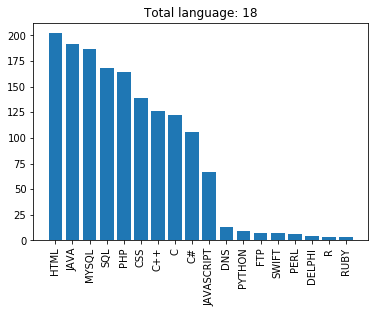

In [16]:
plt.bar(xticks, language.values(), align='center')

plt.xticks(xticks, list(language.keys()))  # 預設 X 座標數字，改顯示水果名
plt.title("Total language: %d" % len(language))  # 給標題
plt.xticks(rotation=90)
plt.show()  # 秀出圖。不一定需要，例如在 inline 模式就不需要

In [17]:
# """
# ====================
# Horizontal bar chart
# ====================

# This example showcases a simple horizontal bar chart.
# """
# import matplotlib.pyplot as plt
# plt.rcdefaults()
# import numpy as np
# plt.rcdefaults()
# fig, ax = plt.subplots()


# # Example data
# # xticks = np.arange(len(language)) 
# y_pos = np.arange(len(language))
# # performance = 3 + 10 * xticks
# error = language.values
# print(xticks)
# ax.barh(y_pos, language.values, align='center',
#         color='R', ecolor='black')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(language)
# # ax.invert_yaxis()  #
# ax.set_xlabel('language') #x軸的標籤
# ax.set_title('The most popular programming language') #標題

# plt.show()

In [18]:
# #!/usr/bin/env python  
# import numpy.numarray as na
# from pylab import *

# #draw plot
# labels = ["sample1", "sample2", "sample3"]
# size =   [659, 2659, 32384]

# x1 = na.array(range(3))*0.9+0.5
# x2 = na.array(range(3))*0.9+1.0
# x3 = na.array(range(3))*0.9+2.0

# #draw bar
# width = 0.2
# b1 = bar(x1, size, width=width, color = 'c')

# #draw tick
# yticks(range(0,33000,5000))
# xticks(x1+0.1, labels)

# #label Y axis
# ylabel('Y axis', fontsize=12, fontweight='bold')

# xlim(0, x3[1])
# ylim(0,33000)
# title("This is an example to draw the bar chart",fontsize=12, fontweight='bold')
# gca().get_xaxis().tick_bottom()
# gca().get_yaxis().tick_left()

# savefig('bar_chart.png')
# savefig('bar_chart.pdf')
# show()

In [19]:
# print (len(language))

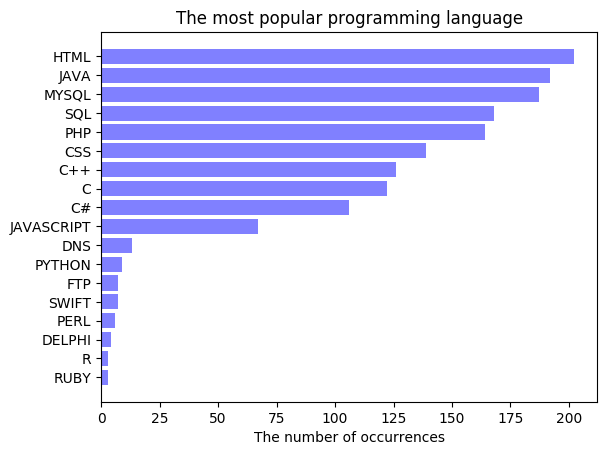

In [20]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(language))
performance = list(language.values())
error = np.random.rand(len(language))

ax.barh(y_pos, performance, align='center',color='#8080ff')
ax.set_yticks(y_pos)
ax.set_yticklabels(language)
ax.invert_yaxis()  
ax.set_xlabel('The number of occurrences')
ax.set_title('The most popular programming language')

plt.show()

In [21]:
pwd

'/home/skydream37/languageETL'

In [22]:
# inner_word("https://www.518.com.tw/unity%E5%B7%A5%E7%A8%8B%E5%B8%AB-%E9%AB%98%E9%9B%84%E5%B8%82-%E5%89%8D%E9%8E%AE%E5%8D%80-job-1344470.html?kw=C&pi=1")

In [23]:
# dict= sorted(static.item(), key=lambda d:d[1], reverse = True)
# print(dict)